In [1]:
#!g1.1
#basic_path = '/content/drive/MyDrive/Colab Notebooks' # colab
basic_path = '' # local

import sys
import os
import torch
import numpy as np
import torchvision
import cv2
import matplotlib.pyplot as plt
#sys.path.insert(0, basic_path+'/WDNet-main')
import WDNet

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
torch.cuda.is_available()

True

In [3]:
#!g1.1
# pretrained generator test
G = WDNet.generator(3,3)
G.load_state_dict(torch.load(os.path.join(basic_path+'../model_WDNet/WDNet_G.pkl')))

image_path = basic_path+'../data_CLWD/test/Watermarked_image/13.jpg'
image = torchvision.io.read_image(image_path)
#image = image[[2,1,0],:,:] # RGB 2 BGR
image = image.float() / 255
image = image.unsqueeze(0)

print('start gen')
img_nowm = G(image)
print('end gen')

start gen
end gen


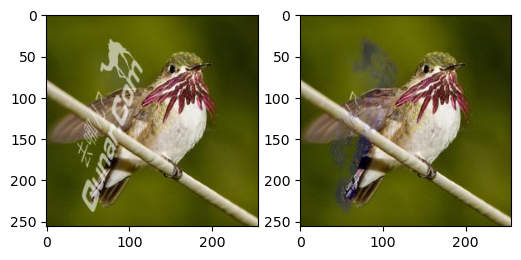

In [4]:
plt.rcParams["figure.figsize"] = (6,4)
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze(0).permute(1,2,0))
plt.subplot(1, 2, 2)
plt.imshow(img_nowm[0].squeeze(0).permute(1,2,0).detach().numpy())

In [2]:
#!g1.1
args ={}
args['epoch'] = 1
args['batch_size'] = 16
args['save_dir'] = basic_path+'../model_WDNet'
args['result_dir'] = ''
args['dataset'] = basic_path+'../data_CLWD'
args['log_dir'] = basic_path+'../model_WDNet'
args['gpu_mode'] = True
args['input_size'] = 28 # не знаю что это
args['dataloader_workers'] = 0
args['gan_type'] = 'CGAN'
args['lrG'] = 0.0002
args['lrD'] = 0.0002
args['beta1'] = 0.5
args['beta2'] = 0.999
args

{'epoch': 1,
 'batch_size': 16,
 'save_dir': '../model_WDNet',
 'result_dir': '',
 'dataset': '../data_CLWD',
 'log_dir': '../model_WDNet',
 'gpu_mode': True,
 'input_size': 28,
 'dataloader_workers': 0,
 'gan_type': 'CGAN',
 'lrG': 0.0002,
 'lrD': 0.0002,
 'beta1': 0.5,
 'beta2': 0.999}

In [3]:
#!g1.1
wdnet = WDNet.WDNet(args)

---------- Networks architecture -------------
-----------------------------------------------


In [4]:
#!g1.1
wdnet.train()

c:\Programs\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Programs\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\vsnau/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [01:07<00:00, 8.22MB/s] 


training start!!


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


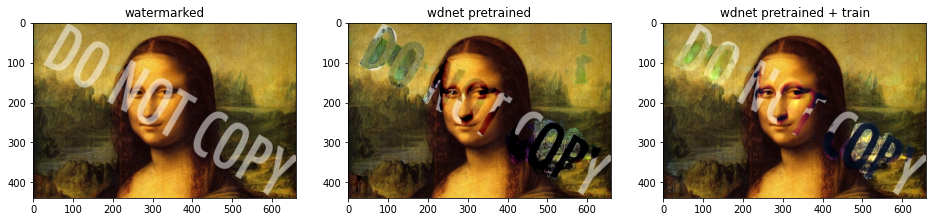

In [82]:
#!g1.1
device='cuda'

G_pre = WDNet.generator(3,3)
G_pre.to(device)
G_pre.load_state_dict(torch.load(os.path.join(basic_path+'pretrained/WDNet_G.pkl')))


G = WDNet.generator(3,3)
G.to(device)
G.load_state_dict(torch.load(os.path.join(basic_path+'save_dir/WDNet_G.pkl')))


image_path = basic_path+'wdnet_test/wm2.jpg'
image = torchvision.io.read_image(image_path)
#image = image[[2,1,0],:,:] # RGB 2 BGR
image = image.float() / 255
image = image.unsqueeze(0)
image = image.to(device)

img_nowm_pre = G_pre(image)
img_nowm = G(image)

plt.rcParams["figure.figsize"] = (16,8)
plt.subplot(1, 3, 1)
plt.gca().set_title('watermarked')
plt.imshow(image.squeeze(0).cpu().permute(1,2,0))
plt.subplot(1, 3, 2)
plt.gca().set_title('wdnet pretrained')
plt.imshow(img_nowm_pre[0].squeeze(0).cpu().permute(1,2,0).detach().numpy())
plt.subplot(1, 3, 3)
plt.gca().set_title('wdnet pretrained + train')
plt.imshow(img_nowm[0].squeeze(0).cpu().permute(1,2,0).detach().numpy())